# **# Distributed Computing - Project 1**

## **1.Prepare Environment**

**1.1 Install Java, Pyspark and Spark NLP**

In [1]:
import os

!apt-get update -qq
!apt-get install -y openjdk-8-jdk-headless -qq

#Install Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

In [2]:
#Install Pyspark
! pip install --ignore-installed pyspark==2.4.4

#Install Spark NLP
! pip install --ignore-installed spark-nlp==2.6.2

     |████████████████████████████████| 215.7 MB 61 kB/s 
     |████████████████████████████████| 197 kB 19.3 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130392 sha256=66c44d3a451691062e2720dbd4943f0d7a21f81956723280ec92b6846579f712
  Stored in directory: /root/.cache/pip/wheels/11/48/19/c3b6b66e4575c164407a83bc065179904ddc33c9d6500846f0
Successfully built pyspark
     |████████████████████████████████| 142 kB 29.3 MB/s 


**1.2 Start Spark Session**

In [3]:
import sparknlp
from sparknlp.pretrained import PretrainedPipeline
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext

import re

#spark = sparknlp.start()
spark = sparknlp.start(spark32=True)

sqlContext = SQLContext(spark)

# **2. Get Classic Corpus**

**2.1 Convert txt files into Python Dataframe**

In [4]:
import pandas as pd
import os
import re

In [5]:
directory ="/content/drive/MyDrive/DC_Project1/data/classic" #Change according to path
text_type = 'C'

classics_df = pd.DataFrame(columns=['id', 'type', 'text'])

for filename in os.listdir(directory):
#filename = "data/classic/45.txt"
    file_ext = os.path.basename(filename).rsplit('.',1)[1] #Get file extension
    if file_ext == "txt":
        with open(directory + '/' + filename, 'r') as file:
            text_id = os.path.basename(filename).rsplit('.',1)[0]
            corpus = file.read()
            corpus = re.sub(';', ' ', corpus)
            corpus = corpus.replace('Chapter', '')
            classics_df.loc[len(classics_df.index)] = [text_id, text_type, corpus]

In [6]:
classics_df

,id,type,text
0,145,C,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMiddlemarch\n\n\...
1,1342,C,\n\n\n\n\nPRIDE AND PREJUDICE\n\nBy Jane Auste...
2,45,C,\n\n\n\n\n ANNE OF GREEN GABL...
3,1905,C,"\n\n\n\n\nTHE GOVERNESS \n\nOR, THE LITTLE FEM..."
4,768,C,\n\n\n\nTranscribed from the 1910 John Murray ...
5,514,C,\n\n\n\nLITTLE WOMEN\n\n\nby\n\nLouisa May Alc...
6,1260,C,\n\n\n\n\nTranscribed from the 1897 Service & ...
7,113,C,\n\n\n\n\n\n\n\n\n\n\nIn Honor of Lisa Hart's ...


In [ ]:
#classica_df.to_csv("/content/drive/MyDrive/DC_Project1/clean_classics_df.csv")

**2.2 Convert Python Dataframe into Spark Dataframe**

In [7]:
df_Spark_classics = sqlContext.createDataFrame(classics_df) #Pyspark SQL dataframe

In [ ]:
#df_Spark_classics.show()

# **3.Get Fanfictions Corpus**

**3.1 Convert txt files into Python Dataframe**

In [8]:
directory ="/content/drive/MyDrive/DC_Project1/data/fanfiction" #Change according to path
text_type = 'F'

fanfictions_df = pd.DataFrame(columns=['id', 'type', 'text'])

for filename in os.listdir(directory):
    file_ext = os.path.basename(filename).rsplit('.',1)[1] #Get file extension
    if file_ext == "txt":
        with open(directory + '/' + filename, 'r') as file:
            text_id = os.path.basename(filename).rsplit('.',1)[0]
            corpus = file.read()
            corpus = corpus.replace('Chapter', '')
            corpus = re.sub(';', ' ', corpus)
            fanfictions_df.loc[len(fanfictions_df.index)] = [text_id, text_type, corpus]

In [9]:
fanfictions_df

,id,type,text
0,1536152,F,"1\nGoing back was the worst.I had hoped that,..."
1,23824330,F,1\nAmy sits facing the window of her room. He...
2,24025603,F,"1\nDisclaimer: I, by no means, claim to own a..."
3,25042705,F,"1\n“But, really,” said Mrs. Bennet rather lou..."
4,33183868,F,1\n \n\n \n\nThere was something luminescent ...
5,35367502,F,1\n“Lily there’s a boy at the door!”\nThe gin...
6,36819574,F,"1\nI was born in sunlight, and dragged into d..."
7,7441657,F,"1\nPrologue\nOctober 31, 1981\nThe view out t..."
8,8523001,F,1\nThere was such a cultural veil of secrecy ...


In [ ]:
#fanfictions_df.to_csv("/content/drive/MyDrive/DC_Project1/clean_fanfic_df.csv")

**3.2 Convert Python Dataframe into Spark Dataframe**

In [10]:
df_Spark_fanfictions = sqlContext.createDataFrame(fanfictions_df) #Pyspark SQL dataframe

In [ ]:
#df_Spark_fanfictions.show()

# **4. Sentiment Analysis**

**4.1. Afinn Score: Validation of Pre-trained Spark NLP models**

We want to go in details for the tone of the books. We used Afinn score to measure how positive or negative each word in the each book. Afinn score ranges from -5 to 5. For example, "I am having good day." scores +3, "I am having bad day scores." -3 or "I am having a horribly bad day scores." -6. 

In here, we standardized the afinn scores by finding the score for each word in the text, adding the scores up and dividing by number of words in the context. 

In the distribution of classics, we can observe that it ranges from -1 to 6 while the distribution of fanfiction ranges from 0 to 3.5.

As verification of what we observed in the spark nlp classification, the mean score for classics is greater than the mean score for fanfictions.

In [15]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=d389ca9e3078205d2a866e254e4cb4e2cf56cfb079f6d4631193aac67264f882
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [16]:
from afinn import Afinn
afinn = Afinn(language='en')

In [17]:
#Example:
afinn.score('Bad day.')

-3.0

In [18]:
classics_df['afinn_score'] = classics_df['text'].apply(afinn.score)

In [ ]:
#Afinn Score of Each Classics
classics_df['afinn_score']

0     7255.0
1     4694.0
2     3248.0
3     1449.0
4    -1778.0
5    11536.0
6     2277.0
7     2111.0
Name: afinn_score, dtype: float64

In [ ]:
classics_df['afinn_score'].describe()

count        8.000000
mean      3849.000000
std       4047.591665
min      -1778.000000
25%       1945.500000
50%       2762.500000
75%       5334.250000
max      11536.000000
Name: afinn_score, dtype: float64

In [ ]:
fanfictions_df['afinn_score'] = fanfictions_df['text'].apply(afinn.score)

In [ ]:
#Afinn Score of Each Fanfictions
fanfictions_df['afinn_score']

0     951.0
1     742.0
2    5798.0
3    4266.0
4    2812.0
5    3693.0
6    7864.0
7    -128.0
8    1868.0
Name: afinn_score, dtype: float64

In [ ]:
fanfictions_df['afinn_score'].describe()

count       9.000000
mean     3096.222222
std      2595.310520
min      -128.000000
25%       951.000000
50%      2812.000000
75%      4266.000000
max      7864.000000
Name: afinn_score, dtype: float64

In [ ]:
#Finding the word counts of each book
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [ ]:
classics_df['word_count'] = classics_df['text'].apply(word_count)

In [ ]:
classics_df['word_count'].describe()

count         8.000000
mean     144911.000000
std       83605.875793
min       50677.000000
25%       97060.250000
50%      118716.000000
75%      185654.250000
max      316375.000000
Name: word_count, dtype: float64

In [ ]:
fanfictions_df['word_count'] = fanfictions_df['text'].apply(word_count)

In [ ]:
fanfictions_df['word_count'].describe()

count         9.000000
mean     161609.111111
std       81806.994025
min       22379.000000
25%      107039.000000
50%      171958.000000
75%      235020.000000
max      268187.000000
Name: word_count, dtype: float64

In [ ]:
#Finding standardized Afinn Score for Classics
classics_df['afinn_adjusted'] = classics_df['afinn_score'] / classics_df['word_count'] * 100

In [ ]:
classics_df['afinn_adjusted'].describe()

count    8.000000
mean     2.586592
std      2.204268
min     -1.533883
25%      2.026717
50%      2.737346
75%      3.342085
max      6.200051
Name: afinn_adjusted, dtype: float64

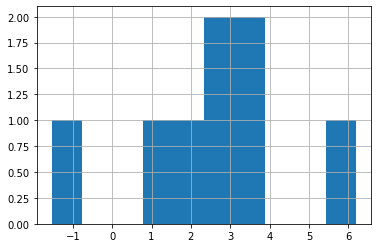

In [ ]:
%matplotlib inline

classics_df['afinn_adjusted'].hist()

In [ ]:
#Finding standardized Afinn Score for Fanfictions
fanfictions_df['afinn_adjusted'] = fanfictions_df['afinn_score'] / fanfictions_df['word_count'] * 100

In [ ]:
fanfictions_df['afinn_adjusted'].describe()

count    9.000000
mean     2.042999
std      1.327796
min     -0.108883
25%      0.979780
50%      2.467024
75%      3.193762
max      3.450144
Name: afinn_adjusted, dtype: float64

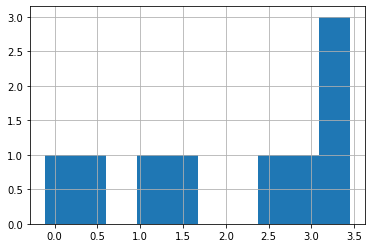

In [ ]:
%matplotlib inline

fanfictions_df['afinn_adjusted'].hist()

**4.2 Sexist? Racist? Neutral?**

We also want to see if there is any difference between classics and fanfictions in terms of sexism and racism. 
Our expectation was finding differences because of the change of mindset over the years.
Based on the pre-trained Spark NLP model we used, we found no differences betwwen the books. All books are predominantly neutral.

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
    
use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")


sentimentdl = ClassifierDLModel.pretrained(name='classifierdl_use_cyberbullying')\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment")

nlpPipeline = Pipeline(
      stages = [
          documentAssembler,
          use,
          sentimentdl
      ])


tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_cyberbullying download started this may take some time.
Approximate size to download 21.4 MB
[OK!]


In [ ]:
class_classics_df = nlpPipeline.fit(df_Spark_classics).transform(df_Spark_classics)

In [ ]:
class_classics_df.select("sentiment").show(truncate=200)

+-----------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                    sentiment|
+-----------------------------------------------------------------------------------------------------------------------------+
|    [[category, 0, 1794757, neutral, [sentence -> 0, sexism -> 0.01997993, neutral -> 0.9725743, racism -> 0.007445744], []]]|
|   [[category, 0, 684347, neutral, [sentence -> 0, sexism -> 0.014876839, neutral -> 0.9834726, racism -> 0.0016505893], []]]|
| [[category, 0, 560512, neutral, [sentence -> 0, sexism -> 7.2845357E-4, neutral -> 0.99895704, racism -> 3.1448164E-4], []]]|
|   [[category, 0, 279760, neutral, [sentence -> 0, sexism -> 0.022217246, neutral -> 0.9720704, racism -> 0.0057123164], []]]|
|   [[category, 0, 649877, neutral, [sentence -> 0, sexism -> 0.006641813, neutral -> 0.99041146, racism

In [ ]:
class_fanfictions_df = nlpPipeline.fit(df_Spark_fanfictions).transform(df_Spark_fanfictions)

In [ ]:
class_fanfictions_df.select("sentiment").show(truncate=200)

+----------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                   sentiment|
+----------------------------------------------------------------------------------------------------------------------------+
|[[category, 0, 967977, neutral, [sentence -> 0, sexism -> 1.9212575E-4, neutral -> 0.99973124, racism -> 7.6599725E-5], []]]|
|[[category, 0, 125204, neutral, [sentence -> 0, sexism -> 8.0332806E-4, neutral -> 0.99915755, racism -> 3.9183953E-5], []]]|
|[[category, 0, 1307851, neutral, [sentence -> 0, sexism -> 0.007224438, neutral -> 0.99257714, racism -> 1.9837526E-4], []]]|
|[[category, 0, 1481183, neutral, [sentence -> 0, sexism -> 0.0029481964, neutral -> 0.9968714, racism -> 1.8038342E-4], []]]|
|  [[category, 0, 513708, neutral, [sentence -> 0, sexism -> 0.004429568, neutral -> 0.9950323, racism -> 5.381